In [266]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.factorplots import interaction_plot

import warnings
warnings.filterwarnings('ignore')

plt.rc('xtick', labelsize = 12)
plt.rc('ytick', labelsize = 12)
plt.rc('axes', labelsize = 16, labelpad = 20)

Importing our dataset again and cleaning our data 

In [267]:
df = pd.read_csv(
    'cleaned_data.csv'
)
for col in ['region', 'sex', 'children', 'smoker']:
    df[col] = df[col].astype('category')

In [268]:
df.sample(5, random_state=12)

,age,sex,bmi,children,smoker,region,charges,bmi_transformed,charges_transformed
936,44,male,29.735,2,no,northeast,32108.66282,4.770718,13.125862
728,18,female,40.280,0,no,northeast,2217.60120,5.486564,9.157844
1307,32,male,28.120,4,yes,northwest,21472.47880,4.649573,12.498512
924,43,male,23.200,0,no,southwest,6250.43500,4.255402,10.641582
137,22,male,25.175,0,no,northwest,2045.68525,4.418585,9.045093


### Building our Linear Regression Model

Lets first begin building our regression model by adding in features starting with Age and Smoker since we identified those had the strongest correlation with charges

In [269]:
model_1 = smf.ols(formula = 'charges ~ age + C(smoker)', data = df).fit()

In [270]:
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     1728.
Date:                Sun, 12 Feb 2023   Prob (F-statistic):               0.00
Time:                        15:23:14   Log-Likelihood:                -13623.
No. Observations:                1338   AIC:                         2.725e+04
Df Residuals:                    1335   BIC:                         2.727e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -2391.6264    528.302  

Our R-squared value is pretty low right now, however we can observe that our p-values for both features are within our pre-determined alpha level of 0.05 so we will include these features in our model. 

Note our AIC is ~27000 

Lets begin to add in our other features starting with BMI and Children

Looking at interactions between Age and Smoker

In [271]:
model_2 = smf.ols(formula = 'charges ~ age + C(smoker) + bmi + C(children)', data = df).fit()

In [272]:
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.4
Date:                Sun, 12 Feb 2023   Prob (F-statistic):               0.00
Time:                        15:23:14   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.209e+04    947.781  

We can see our R-squared increased slightly and our AIC is still ~2700. Judging from the p-vales the children feature in our dataset doesn't seem to have too much statistical significance in our model, however we will keep it in for now.

Lets add in our final features Region and Sex, which we identified in our EDA probably have the lowest correaltion with charges

In [273]:
model_3 = smf.ols(formula = 'charges ~ age + C(smoker) + bmi + C(children) + C(region) + C(sex)', data = df).fit()

In [274]:
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     334.7
Date:                Sun, 12 Feb 2023   Prob (F-statistic):               0.00
Time:                        15:23:14   Log-Likelihood:                -13545.
No. Observations:                1338   AIC:                         2.712e+04
Df Residuals:                    1325   BIC:                         2.718e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1.19

Our R-squared value didn't increase and our AIC increased slightly. We can obsevere that, as expected, our sex feature doesn't have any statistical significance in our model. Lets remove this feature in the next iteration

In [275]:
model_4 = smf.ols(formula = 'charges ~ age + C(smoker) + bmi + C(children) + C(region)', data = df).fit()

In [276]:
print('R-squared',model_4.rsquared)
print('AIC', model_4.aic)

R-squared 0.7519075911557075
AIC 27114.152765445462


### Optimizing our model

Now that we have an initial model with a baseline R-squared and AIC value we can begin to optimize our model

Lets start by substituting in our box-cox transformed BMI feature

In [277]:
model_5 = smf.ols(formula = 'charges ~ age + C(smoker) + bmi_transformed + C(children) + C(region)', data = df).fit()

In [278]:
print('R-squared',model_5.rsquared)
print('AIC', model_5.aic)

R-squared 0.7523630536345671
AIC 27111.69412965242


It didn't seem to impact our R-squared too much

We identified possible interaction terms with the smoker features.  

Lets visualize those interaction terms starting with age

In [281]:
reg_1  = smf.ols(formula = 'charges ~ age + C(smoker)', data = df).fit()
reg_2 = smf.ols(formula = 'charges ~ age * C(smoker)', data = df).fit()

In [282]:
print(reg_1.params)

Intercept           -2391.626359
C(smoker)[T.yes]    23855.304817
age                   274.871186
dtype: float64


In [283]:
print(reg_2.params)

Intercept               -2091.420557
C(smoker)[T.yes]        22385.548683
age                       267.248913
age:C(smoker)[T.yes]       37.988689
dtype: float64


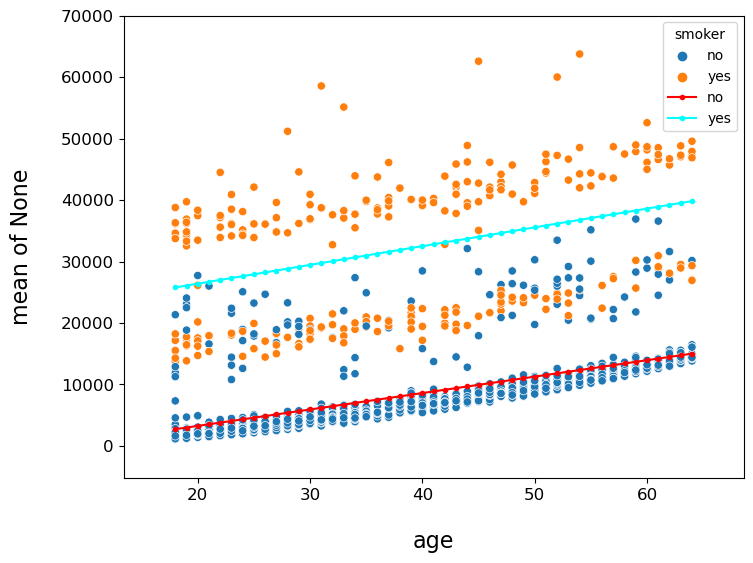

In [284]:
fig = plt.figure(figsize = (8,6))
gs = fig.add_gridspec(1,1)
ax = [None]
ax[0] = fig.add_subplot(gs[0,0])

sns.scatterplot(
    x  = df['age'],
    y = df['charges'],
    hue = df['smoker'],
    ax = ax[0]
)

interaction_plot(df['age'], df['smoker'], reg_2.fittedvalues, ax = ax[0])

plt.show()

Because our lines are relatively parallel (parameter values ~270) between the smokers and non smokers it suggests that there is no interaction between age and smoker in our dataset

Lets look at BMI and smoker now

In [285]:
reg_3  = smf.ols(formula = 'charges ~ bmi_transformed + C(smoker)', data = df).fit()
reg_4 = smf.ols(formula = 'charges ~ bmi_transformed * C(smoker)', data = df).fit()

In [286]:
print(reg_3.params)

Intercept          -17524.574746
C(smoker)[T.yes]    23604.558797
bmi_transformed      5391.924382
dtype: float64


In [287]:
print(reg_4.params)

Intercept                            2583.172578
C(smoker)[T.yes]                   -68454.063900
bmi_transformed                      1215.334043
bmi_transformed:C(smoker)[T.yes]    19114.979934
dtype: float64


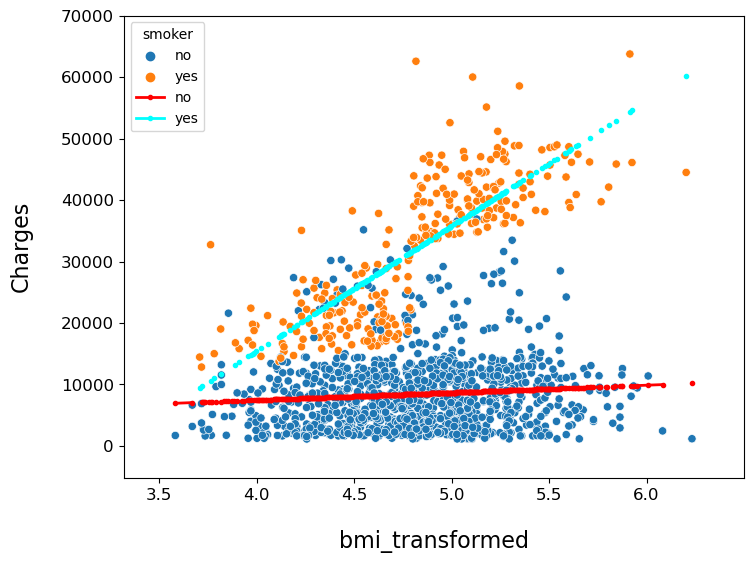

In [288]:
fig = plt.figure(figsize = (8,6))
gs = fig.add_gridspec(1,1)
ax = [None]
ax[0] = fig.add_subplot(gs[0,0])

sns.scatterplot(
    x  = df['bmi_transformed'],
    y = df['charges'],
    hue = df['smoker'],
    ax = ax[0]
)

interaction_plot(df['bmi_transformed'], df['smoker'], reg_4.fittedvalues, ax = ax[0], plottype='b', linewidth = 2)

ax[0].set_ylabel('Charges')

plt.show()

Here we can observe that there is interaction between BMI and smoker as it relates to our dependent variable charges. Lets include this in our model

In [304]:
model_6 = smf.ols(formula = 'charges ~ age + C(smoker) + bmi_transformed * C(smoker) + C(children) + C(region)', data = df).fit()

In [305]:
print('R-squared',model_6.rsquared)
print('AIC', model_6.aic)

R-squared 0.842178506729695
AIC 26510.92627668329


Including this interaction term increased our R-squared value significantly

In [306]:
percent_increase = lambda x,y: np.round(((x-y)/y) * 100,2)

print("R-squared % increase : ", percent_increase(model_6.rsquared, model_5.rsquared), "%")
print("AIC % Decrease: ", percent_increase(model_6.aic, model_5.aic), "%")

R-squared % increase :  11.94 %
AIC % Decrease:  -2.22 %


Our R-squared value increased and our AIC decreaased so we will want to keep this interaction term in our model

In our EDA we had identified a possible interaction between region and sex as well.  

Lets put that in now.

In [307]:
model_7 = smf.ols(formula = 'charges ~ age + C(smoker) + bmi_transformed * C(smoker) + C(children) + C(region) * C(sex)', data = df).fit()

In [308]:
print('R-squared',model_7.rsquared)
print('AIC', model_7.aic)

print("R-squared % increase : ", percent_increase(model_7.rsquared, model_6.rsquared), "%")
print("AIC % Change: ", percent_increase(model_7.aic, model_6.aic), "%")

R-squared 0.8426962128034138
AIC 26514.529984841534
R-squared % increase :  0.06 %
AIC % Change:  0.01 %


Our R-squared increased at a higher rate than our AIC did so we can probably include this interaction term as well.

In [309]:
print(model_7.pvalues)

Intercept                                 9.254779e-02
C(smoker)[T.yes]                          8.037173e-82
C(children)[T.1]                          3.268379e-01
C(children)[T.2]                          1.746842e-05
C(children)[T.3]                          2.103893e-02
C(children)[T.4]                          5.650827e-04
C(children)[T.5]                          8.605547e-02
C(region)[T.northwest]                    1.455907e-01
C(region)[T.southeast]                    8.191350e-03
C(region)[T.southwest]                    9.054551e-03
C(sex)[T.male]                            1.541568e-01
C(region)[T.northwest]:C(sex)[T.male]     7.412937e-01
C(region)[T.southeast]:C(sex)[T.male]     5.814316e-01
C(region)[T.southwest]:C(sex)[T.male]     7.369560e-01
age                                      1.456589e-133
bmi_transformed                           3.607907e-01
bmi_transformed:C(smoker)[T.yes]         3.033042e-132
dtype: float64


However from our p-values we can see that the region * sex interaction term has no statistical significance in our model so to mitigate the risk of overfitting we will not include this interaction term in our final model

### Our Final Model

In [310]:
formula =  'charges ~ age + C(smoker) + bmi_transformed * C(smoker) + C(children) + C(region)'
model_final = smf.ols(formula = formula, data = df).fit()

In [311]:
print(model_final.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     589.2
Date:                Sun, 12 Feb 2023   Prob (F-statistic):               0.00
Time:                        15:25:53   Log-Likelihood:                -13242.
No. Observations:                1338   AIC:                         2.651e+04
Df Residuals:                    1325   BIC:                         2.658e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [312]:
print('Final R-squared :', model_final.rsquared)

Final R-squared : 0.842178506729695


Lets do a quick train test split to check model accuracy

In [313]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = df[['age','sex','bmi', 'bmi_transformed','children','smoker','region']]
Y = df['charges']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state=7)
x_train['charges'] = y_train

y_pred_model_4 = model_4.predict(x_test)
y_pred_final = model_final.predict(x_test)

In [314]:
print('Inital Model MSE :', mean_squared_error(y_test, y_pred_model_4))
print('Final Model MSE: ', mean_squared_error(y_test, y_pred_final))
print('% Decrease: ', percent_increase(
    mean_squared_error(y_test, y_pred_final),
    mean_squared_error(y_test, y_pred_model_4)
))

Inital Model MSE : 39005531.394638285
Final Model MSE:  29113647.51653348
% Decrease:  -25.36


Model optimization decreased the MSE by over 25%

In [315]:
from sklearn.preprocessing import normalize

print('Inital Model MSE Normalized :', mean_squared_error(normalize([y_test]), normalize([y_pred_model_4])))
print('Final Model MSE Normalized : ', mean_squared_error(normalize([y_test]), normalize([y_pred_final])))


Inital Model MSE Normalized : 0.0008722005405734418
Final Model MSE Normalized :  0.0006421587544859511


Finally lets observe the residuals from our final model

<AxesSubplot:xlabel='charges'>

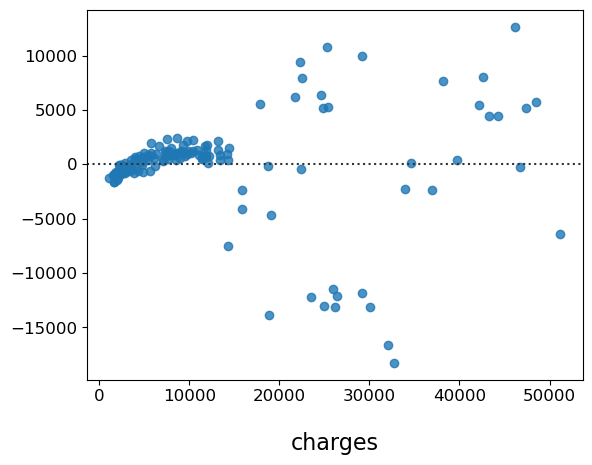

In [316]:
sns.residplot(
    x = y_test,
    y = y_pred_final
)

We can see that our model is quite accurate at predicting charges that are under 20k. This is likely due to the fact that our charges feature was heavily skewed right in our dataset.

In [317]:
df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_transformed,charges_transformed
0,19,female,27.900,0,yes,southwest,16884.92400,4.632782,12.128980
1,18,male,33.770,1,no,southeast,1725.55230,5.058687,8.808596
2,28,male,33.000,3,no,southeast,4449.46200,5.005229,10.147521
3,33,male,22.705,0,no,northwest,21984.47061,4.213339,12.534950
4,32,male,28.880,0,no,northwest,3866.85520,4.707037,9.945637


In [319]:
sample_data = {
    'age' : 24,
    'sex' : 'male',
    'children' : 0,
    'smoker' : 'no',
    'region' : 'northwest'
}



## Final Thoughts